In [4]:
aml_pretrans = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/data_mrna_seq_rpkm_zscores_ref_all_samples.txt", delimiter = "\t")
aml_pretrans.dropna(subset = ["Hugo_Symbol"], inplace = True)

for index, row in aml_pretrans.iterrows():
    row_string = "".join(map(str, row))
    if row_string.startswith(("LINC", "hsa", "sno")):
        aml_pretrans.drop(index, inplace = True) #Went from 22843 to 22656: dropped 88 non protein-coding

aml_pretrans.reset_index(drop = True, inplace = True)
print(aml_pretrans)
print(aml_pretrans.shape)

aml_pretrans = aml_pretrans.groupby("Hugo_Symbol").mean() #Went from 22656 to 22650: dropped 7 dups
aml_pretrans[aml_pretrans.columns[0]]

         Hugo_Symbol  aml_ohsu_2022_2157_BA2452  aml_ohsu_2022_2269_BA2922  \
0             TSPAN6                    -2.7865                    -3.0837   
1               DPM1                    -1.3511                    -1.2484   
2              SCYL3                    -0.2185                     1.4769   
3           C1orf112                     1.1468                    -0.7416   
4                FGR                    -1.9246                    -0.9194   
...              ...                        ...                        ...   
22650  RP11-196O16.1                     0.1460                    -1.2168   
22651   RP4-671G15.2                    -0.9881                    -3.1800   
22652  RP11-731C17.2                     0.2823                     1.0992   
22653   RP4-621B10.8                    -3.3114                    -2.1304   
22654   RP11-114I8.4                     0.3263                     0.7393   

       aml_ohsu_2022_2313_BA2707  aml_ohsu_2022_2418_BA2409  \


Hugo_Symbol
A1BG       -3.3470
A1BG-AS1    0.4945
A2M         0.3082
A2M-AS1    -1.2069
A2ML1      -9.0566
             ...  
ZXDC       -1.1378
ZYG11B     -0.5020
ZYX        -1.1532
ZZEF1      -2.5151
ZZZ3        1.4311
Name: aml_ohsu_2022_2157_BA2452, Length: 22649, dtype: float64

In [6]:
mrna_data_transposed = aml_pretrans.T 
mrna_data_transposed = mrna_data_transposed.reset_index()
print(mrna_data_transposed)
mrna_data_transposed.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/mrna_data_transposed.txt", sep = "\t", index = False)
print("Transposed yayy!!")

Hugo_Symbol                      index    A1BG  A1BG-AS1     A2M  A2M-AS1  \
0            aml_ohsu_2022_2157_BA2452 -3.3470    0.4945  0.3082  -1.2069   
1            aml_ohsu_2022_2269_BA2922 -3.3608    1.2292 -1.4551  -3.0074   
2            aml_ohsu_2022_2313_BA2707 -3.8850    0.0829 -1.6819   0.8300   
3            aml_ohsu_2022_2418_BA2409 -6.3159    1.3246 -2.8621  -0.3080   
4            aml_ohsu_2022_2374_BA2480 -5.7929    0.6841 -4.2860  -0.8714   
..                                 ...     ...       ...     ...      ...   
666          aml_ohsu_2022_2749_BA3375 -3.1104    0.2956 -3.8953   0.5362   
667          aml_ohsu_2022_2774_BA3249  0.4813    0.1806 -4.6278  -0.0306   
668          aml_ohsu_2022_2594_BA3385 -3.9677    1.0968 -3.0434  -2.0816   
669          aml_ohsu_2022_2607_BA3416  1.0321    1.0003 -3.0513  -2.3729   
670          aml_ohsu_2022_2611_BA3123 -4.1333    0.8316 -3.2062   0.7365   

Hugo_Symbol    A2ML1  A3GALT2  A4GALT    AAAS    AACS  ...    ZW10  ZWILCH 

In [7]:
def drop_constant_columns(df):
    return df.loc[:, (df != df.iloc[0]).any()]

In [8]:
mrna_data_transposed = drop_constant_columns(mrna_data_transposed)
print(mrna_data_transposed)

Hugo_Symbol                      index    A1BG  A1BG-AS1     A2M  A2M-AS1  \
0            aml_ohsu_2022_2157_BA2452 -3.3470    0.4945  0.3082  -1.2069   
1            aml_ohsu_2022_2269_BA2922 -3.3608    1.2292 -1.4551  -3.0074   
2            aml_ohsu_2022_2313_BA2707 -3.8850    0.0829 -1.6819   0.8300   
3            aml_ohsu_2022_2418_BA2409 -6.3159    1.3246 -2.8621  -0.3080   
4            aml_ohsu_2022_2374_BA2480 -5.7929    0.6841 -4.2860  -0.8714   
..                                 ...     ...       ...     ...      ...   
666          aml_ohsu_2022_2749_BA3375 -3.1104    0.2956 -3.8953   0.5362   
667          aml_ohsu_2022_2774_BA3249  0.4813    0.1806 -4.6278  -0.0306   
668          aml_ohsu_2022_2594_BA3385 -3.9677    1.0968 -3.0434  -2.0816   
669          aml_ohsu_2022_2607_BA3416  1.0321    1.0003 -3.0513  -2.3729   
670          aml_ohsu_2022_2611_BA3123 -4.1333    0.8316 -3.2062   0.7365   

Hugo_Symbol    A2ML1  A3GALT2  A4GALT    AAAS    AACS  ...    ZW10  ZWILCH 

In [9]:
import pandas as pd
patient = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/data_clinical_patient.csv", skiprows = 4)
sample = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/data_clinical_sample.csv", skiprows = 4)

aml_merged = pd.merge(left=sample, right=patient, how='inner', on='PATIENT_ID')
print(aml_merged.head())
aml_merged.to_csv('~/Documents/uzun_lab/aml_ohsu_2022/aml_merged.csv', index=True)

           PATIENT_ID                  SAMPLE_ID    COHORT USED_IN_MANUSCRIPT  \
0  aml_ohsu_2022_2476  aml_ohsu_2022_2476_BA2102  Waves1+2                Yes   
1  aml_ohsu_2022_2476  aml_ohsu_2022_2476_BA2005  Waves1+2                 No   
2  aml_ohsu_2022_2476  aml_ohsu_2022_2476_BA3074  Waves1+2                 No   
3  aml_ohsu_2022_2476  aml_ohsu_2022_2476_BA2555  Waves1+2                 No   
4  aml_ohsu_2022_2476  aml_ohsu_2022_2476_BA3073  Waves1+2                 No   

   CENTER_ID CEBPA_BIALLELIC  AGE_AT_DIAGNOSIS IS_RELAPSE IS_DENOVO  \
0          1             NaN              27.0      FALSE     FALSE   
1          1             NaN              27.0       TRUE     FALSE   
2          1             NaN              27.0      FALSE     FALSE   
3          1             NaN              27.0       TRUE     FALSE   
4          1             NaN              27.0      FALSE     FALSE   

  IS_TRANSFORMED  ...                                    DX_AT_INCLUSION  \
0         

In [10]:
clinicalsamp_identifier = set(aml_merged["SAMPLE_ID"])
print(len(clinicalsamp_identifier))

mrnasamp_identifier = set(mrna_data_transposed["index"])
print(len(mrnasamp_identifier))

limited_both = clinicalsamp_identifier.intersection(mrnasamp_identifier)
print(len(limited_both))

limited_aml_merged = aml_merged[aml_merged["SAMPLE_ID"].isin(limited_both)]
print(limited_aml_merged)

limited_aml_merged.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/limited_aml_merged.txt", sep="\t", index=True)

limited_mrna_data_transposed = mrna_data_transposed[mrna_data_transposed["index"].isin(limited_both)]
limited_mrna_data_transposed.rename(columns = {"index" : "SAMPLE_ID"}, inplace = True)
print(limited_mrna_data_transposed)

limited_mrna_data_transposed.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/limited_mrna_data_transposed.txt", sep="\t", index=True)

942
671
671
             PATIENT_ID                  SAMPLE_ID    COHORT  \
5    aml_ohsu_2022_2157  aml_ohsu_2022_2157_BA2452      Both   
8    aml_ohsu_2022_2269  aml_ohsu_2022_2269_BA2922  Waves1+2   
22   aml_ohsu_2022_2313  aml_ohsu_2022_2313_BA2707      Both   
29   aml_ohsu_2022_2418  aml_ohsu_2022_2418_BA2409  Waves1+2   
31   aml_ohsu_2022_2374  aml_ohsu_2022_2374_BA2480  Waves1+2   
..                  ...                        ...       ...   
929  aml_ohsu_2022_2749  aml_ohsu_2022_2749_BA3375  Waves3+4   
930  aml_ohsu_2022_2774  aml_ohsu_2022_2774_BA3249  Waves3+4   
931  aml_ohsu_2022_2594  aml_ohsu_2022_2594_BA3385  Waves3+4   
932  aml_ohsu_2022_2607  aml_ohsu_2022_2607_BA3416  Waves3+4   
934  aml_ohsu_2022_2611  aml_ohsu_2022_2611_BA3123  Waves3+4   

    USED_IN_MANUSCRIPT  CENTER_ID CEBPA_BIALLELIC  AGE_AT_DIAGNOSIS  \
5                   No          1             NaN              34.0   
8                  Yes          1             NaN              11.0   
22    

In [15]:
# missing values per column
round((limited_aml_merged.isnull().sum()/limited_aml_merged.shape[0])*100,2)

PATIENT_ID                            0.00
SAMPLE_ID                             0.00
COHORT                                0.00
USED_IN_MANUSCRIPT                    0.00
CENTER_ID                             0.00
                                     ...  
RESPONSE_DURATION_TO_INDUCTION_TX    20.27
MOST_RECENT_TREATMENT_TYPE            8.94
OS_STATUS                             3.28
OS_MONTHS                             0.00
CAUSE_OF_DEATH                        3.28
Length: 65, dtype: float64

In [16]:
def drop_constant_columns(df):
    return df.loc[:, (df != df.iloc[0]).any()]

In [17]:
limited_aml_merged_new = drop_constant_columns(limited_aml_merged)

print(limited_aml_merged_new)

             PATIENT_ID                  SAMPLE_ID    COHORT  \
5    aml_ohsu_2022_2157  aml_ohsu_2022_2157_BA2452      Both   
8    aml_ohsu_2022_2269  aml_ohsu_2022_2269_BA2922  Waves1+2   
22   aml_ohsu_2022_2313  aml_ohsu_2022_2313_BA2707      Both   
29   aml_ohsu_2022_2418  aml_ohsu_2022_2418_BA2409  Waves1+2   
31   aml_ohsu_2022_2374  aml_ohsu_2022_2374_BA2480  Waves1+2   
..                  ...                        ...       ...   
929  aml_ohsu_2022_2749  aml_ohsu_2022_2749_BA3375  Waves3+4   
930  aml_ohsu_2022_2774  aml_ohsu_2022_2774_BA3249  Waves3+4   
931  aml_ohsu_2022_2594  aml_ohsu_2022_2594_BA3385  Waves3+4   
932  aml_ohsu_2022_2607  aml_ohsu_2022_2607_BA3416  Waves3+4   
934  aml_ohsu_2022_2611  aml_ohsu_2022_2611_BA3123  Waves3+4   

    USED_IN_MANUSCRIPT  CENTER_ID CEBPA_BIALLELIC  AGE_AT_DIAGNOSIS  \
5                   No          1             NaN              34.0   
8                  Yes          1             NaN              11.0   
22                

In [18]:
# Is this a good threshold
threshold = len(limited_aml_merged_new)/2 #50%
print(threshold)

limited_aml_merged_new_again = limited_aml_merged_new.dropna(axis=1, thresh=threshold)
limited_aml_merged_new_again.head()

335.5


,PATIENT_ID,SAMPLE_ID,COHORT,USED_IN_MANUSCRIPT,CENTER_ID,AGE_AT_DIAGNOSIS,IS_RELAPSE,IS_DENOVO,IS_TRANSFORMED,SPECIFIC_DX_AT_ACQUISITION_MDSMPN,...,DX_AT_INCLUSION,SPECIFIC_DX_AT_INCLUSION,CUMULATIVE_TREATMENT_TYPE_COUNT,CUMULATIVE_TREATMENT_TYPES,TYPE_INDUCTION_TX,RESPONSE_DURATION_TO_INDUCTION_TX,MOST_RECENT_TREATMENT_TYPE,OS_STATUS,OS_MONTHS,CAUSE_OF_DEATH
5,aml_ohsu_2022_2157,aml_ohsu_2022_2157_BA2452,Both,No,1,34.0,FALSE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with mutated NPM1,1.0,Standard Chemotherapy,Standard Chemotherapy,6.0,Standard Chemotherapy,1:DECEASED,19.561644,Dead-Unknown
8,aml_ohsu_2022_2269,aml_ohsu_2022_2269_BA2922,Waves1+2,Yes,1,11.0,TRUE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with t(6;9)(p23;q34); DEK-NUP214,6.0,DLI|Standard Chemotherapy|Bone Marrow Transpla...,Standard Chemotherapy,9.0,Targeted Therapy - Kinase Inhibitor(s),1:DECEASED,54.410959,Dead-Disease
22,aml_ohsu_2022_2313,aml_ohsu_2022_2313_BA2707,Both,No,1,68.0,TRUE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,Therapy-related myeloid neoplasms,1.0,Standard Chemotherapy,Standard Chemotherapy,7.0,Standard Chemotherapy,1:DECEASED,40.701370,Dead-Disease
29,aml_ohsu_2022_2418,aml_ohsu_2022_2418_BA2409,Waves1+2,Yes,1,71.0,FALSE,TRUE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,Acute monoblastic and monocytic leukaemia,2.0,Standard Chemotherapy|Bone Marrow Transplant,Standard Chemotherapy,7.0,Bone Marrow Transplant,1:DECEASED,13.052055,Dead-Disease
31,aml_ohsu_2022_2374,aml_ohsu_2022_2374_BA2480,Waves1+2,Yes,1,56.0,TRUE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with mutated NPM1,1.0,Standard Chemotherapy,Standard Chemotherapy,6.0,Standard Chemotherapy,1:DECEASED,57.041096,Dead-Disease


In [ ]:
# Checking missing values again
limited_aml_merged_new_again.shape
round((limited_aml_merged_new_again.isnull().sum()/limited_aml_merged_new_again.shape[0])*100,2)

In [24]:
limited_aml_merged_new_again = limited_aml_merged_new_again[limited_aml_merged_new_again["RESPONSE_TO_INDUCTION_TX"].isin(["Complete Response", "Complete Reseponse i", "Refractory"])]
limited_aml_merged_new_again.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/limited_aml_merged_new_again.txt", sep = "\t")

In [ ]:
# Checking missing values after ONLY KEEPING RTI VALUES
limited_aml_merged_new_again.shape
round((limited_aml_merged_new_again.isnull().sum()/limited_aml_merged_new_again.shape[0])*100,2)

In [26]:
# Bless Jessy for saving my life here
# limited_aml_merged_new_again_yup = limited_aml_merged_new_again.drop(["OTHER_CYTOGENETICS", "SURFACE_ANTIGENS_IMMUNOHISTOCHEMICAL_STAINS", "VARIANT_SUMMARY", "RACE", "ETHNICITY"], axis = 1)
# print("OKAY WE UPDATED IT AGAIN WAHOO")
limited_aml_merged_new_again.to_csv('~/Documents/uzun_lab/aml_ohsu_2022/limited_aml_merged_new_again_what.csv', index = True)
limited_aml_merged_new_again
# NO TOUCHY.

,PATIENT_ID,SAMPLE_ID,COHORT,USED_IN_MANUSCRIPT,CENTER_ID,AGE_AT_DIAGNOSIS,IS_RELAPSE,IS_DENOVO,IS_TRANSFORMED,SPECIFIC_DX_AT_ACQUISITION_MDSMPN,...,DX_AT_INCLUSION,SPECIFIC_DX_AT_INCLUSION,CUMULATIVE_TREATMENT_TYPE_COUNT,CUMULATIVE_TREATMENT_TYPES,TYPE_INDUCTION_TX,RESPONSE_DURATION_TO_INDUCTION_TX,MOST_RECENT_TREATMENT_TYPE,OS_STATUS,OS_MONTHS,CAUSE_OF_DEATH
5,aml_ohsu_2022_2157,aml_ohsu_2022_2157_BA2452,Both,No,1,34.0,FALSE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with mutated NPM1,1.0,Standard Chemotherapy,Standard Chemotherapy,6.0,Standard Chemotherapy,1:DECEASED,19.561644,Dead-Unknown
8,aml_ohsu_2022_2269,aml_ohsu_2022_2269_BA2922,Waves1+2,Yes,1,11.0,TRUE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with t(6;9)(p23;q34); DEK-NUP214,6.0,DLI|Standard Chemotherapy|Bone Marrow Transpla...,Standard Chemotherapy,9.0,Targeted Therapy - Kinase Inhibitor(s),1:DECEASED,54.410959,Dead-Disease
22,aml_ohsu_2022_2313,aml_ohsu_2022_2313_BA2707,Both,No,1,68.0,TRUE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,Therapy-related myeloid neoplasms,1.0,Standard Chemotherapy,Standard Chemotherapy,7.0,Standard Chemotherapy,1:DECEASED,40.701370,Dead-Disease
29,aml_ohsu_2022_2418,aml_ohsu_2022_2418_BA2409,Waves1+2,Yes,1,71.0,FALSE,TRUE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,Acute monoblastic and monocytic leukaemia,2.0,Standard Chemotherapy|Bone Marrow Transplant,Standard Chemotherapy,7.0,Bone Marrow Transplant,1:DECEASED,13.052055,Dead-Disease
31,aml_ohsu_2022_2374,aml_ohsu_2022_2374_BA2480,Waves1+2,Yes,1,56.0,TRUE,FALSE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with mutated NPM1,1.0,Standard Chemotherapy,Standard Chemotherapy,6.0,Standard Chemotherapy,1:DECEASED,57.041096,Dead-Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,aml_ohsu_2022_2595,aml_ohsu_2022_2595_BA3300,Waves3+4,Yes,1,0.0,FALSE,TRUE,FALSE,False,...,Acute Leukaemias Of Ambiguous Lineage,"Mixed phenotype acute leukaemia, T/myeloid, NOS",3.0,Standard Chemotherapy|Bone Marrow Transplant|I...,Standard Chemotherapy,28.0,Bone Marrow Transplant,1:DECEASED,10.323288,Dead-Disease
929,aml_ohsu_2022_2749,aml_ohsu_2022_2749_BA3375,Waves3+4,Yes,1,63.0,FALSE,TRUE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with mutated NPM1,2.0,Standard Chemotherapy|Bone Marrow Transplant,Standard Chemotherapy,7.0,Bone Marrow Transplant,1:DECEASED,5.621918,Dead-Treatment
931,aml_ohsu_2022_2594,aml_ohsu_2022_2594_BA3385,Waves3+4,Yes,1,50.0,FALSE,TRUE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML with mutated NPM1,2.0,Standard Chemotherapy|Bone Marrow Transplant,Standard Chemotherapy,6.0,Bone Marrow Transplant,1:DECEASED,8.679452,Dead-Disease
932,aml_ohsu_2022_2607,aml_ohsu_2022_2607_BA3416,Waves3+4,Yes,1,54.0,FALSE,TRUE,FALSE,False,...,Acute Myeloid Leukaemia (AML) And Related Prec...,AML without maturation,1.0,Standard Chemotherapy,Standard Chemotherapy,3.0,Standard Chemotherapy,1:DECEASED,0.789041,Dead-Disease


In [ ]:
#Already executed above
'''
limited_aml_merged_new_again_yup = limited_aml_merged_new_again[limited_aml_merged_new_again["RESPONSE_TO_INDUCTION_TX"].isin(["Complete Response", "Complete Reseponse i", "Refractory"])]
print(limited_aml_merged_new_again_yup)
limited_aml_merged_new_again_yup.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/limited_aml_merged_new_again_yup.txt", sep ="\t", index = True)
'''

In [ ]:
#Checking missing values. once again.
limited_aml_merged_new_again.shape
round((limited_aml_merged_new_again.isnull().sum()/limited_aml_merged_new_again.shape[0])*100,2)

In [28]:
lamna_ao = limited_aml_merged_new_again.dropna()
lamna_ao.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/lamna_ao.txt", sep = "\t")
lamna_ao.shape
print("YYYYYAYAAAAAAAAAAYYYY")

YYYYYAYAAAAAAAAAAYYYY


In [ ]:
#Checking missing values. once again. pt2.
lamna_ao.shape
round((lamna_ao.isnull().sum()/lamna_ao.shape[0])*100,2)

In [30]:
#Binary encoded features
encoded_lamna_ao = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/lamna_ao.txt", delimiter = "\t", index_col = False)

encoded_lamna_ao = pd.DataFrame(lamna_ao)

encoded_lamna_ao['USED_IN_MANUSCRIPT'] = encoded_lamna_ao['USED_IN_MANUSCRIPT'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['IS_RELAPSE'] = encoded_lamna_ao['IS_RELAPSE'].apply(lambda x: 1 if x == 'TRUE' else 0)
encoded_lamna_ao['IS_DENOVO'] = encoded_lamna_ao['IS_DENOVO'].apply(lambda x: 1 if x == 'TRUE' else 0)
encoded_lamna_ao['IS_TRANSFORMED'] = encoded_lamna_ao['IS_TRANSFORMED'].apply(lambda x: 1 if x == 'TRUE' else 0)
encoded_lamna_ao['RESPONSE_TO_INDUCTION_TX'] = encoded_lamna_ao['RESPONSE_TO_INDUCTION_TX'].apply( lambda x: 0 if x == 'Refractory' else (1 if x in ['Complete Response', 'Complete Response i'] else None))
encoded_lamna_ao['FLT3_ITD'] = encoded_lamna_ao['FLT3_ITD'].apply(lambda x: 1 if x == 'Positive' else 0)
encoded_lamna_ao['NPM1'] = encoded_lamna_ao['NPM1'].apply(lambda x: 1 if x == 'Positive' else 0)
encoded_lamna_ao['CANCER_TYPE'] = encoded_lamna_ao['CANCER_TYPE'].apply(lambda x: 1 if x == 'Acute Myeloid Leukemia' else 0)
encoded_lamna_ao['ONCOTREE_CODE'] = encoded_lamna_ao['ONCOTREE_CODE'].apply(lambda x: 1 if x == 'AML' else 0)
encoded_lamna_ao['SEX'] = encoded_lamna_ao['SEX'].apply(lambda x: 1 if x == 'Male' else 0)
encoded_lamna_ao['SOMATIC_STATUS'] = encoded_lamna_ao['SOMATIC_STATUS'].apply(lambda x: 1 if x == 'MATCHED' else 0)
encoded_lamna_ao['PRIOR_MALIGNANCY_NON_MYELOID'] = encoded_lamna_ao['PRIOR_MALIGNANCY_NON_MYELOID'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MALIGNANCY_RADIATION_TX'] = encoded_lamna_ao['PRIOR_MALIGNANCY_RADIATION_TX'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MDS'] = encoded_lamna_ao['PRIOR_MDS'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MDS_MORE_THAN_TWO_MTHS'] = encoded_lamna_ao['PRIOR_MDS_MORE_THAN_TWO_MTHS'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MDS_MPN'] = encoded_lamna_ao['PRIOR_MDS_MPN'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MDS_MPN_MORE_THAN_TWO_MTHS'] = encoded_lamna_ao['PRIOR_MDS_MPN_MORE_THAN_TWO_MTHS'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MPN'] = encoded_lamna_ao['PRIOR_MPN'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['PRIOR_MPN_MORE_THAN_TWO_MONTHS'] = encoded_lamna_ao['PRIOR_MPN_MORE_THAN_TWO_MONTHS'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_lamna_ao['OS_STATUS'] = encoded_lamna_ao['OS_STATUS'].apply(lambda x: 1 if x == '1:DECEASED' else 0)

encoded_lamna_ao.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/encoded_lamna_ao.txt", sep = "\t", index = True)

In [34]:
encoded_lamna_aod = encoded_lamna_ao.drop(["CANCER_TYPE_DETAILED", "SPECIMEN_GROUPS", "CUMULATIVE_TREATMENT_REGIMENS", "CUMULATIVE_TREATMENT_STAGES", "CURRENT_REGIMEN", "KARYOTYPE", "SPECIFIC_DX_AT_INCLUSION", "CUMULATIVE_TREATMENT_TYPES", "TYPE_INDUCTION_TX", "MOST_RECENT_TREATMENT_TYPE", "SPECIFIC_DX_AT_ACQUISITION_MDSMPN", "CURRENT_STAGE", "CUMULATIVE_CHEMO"], axis = 1)
encoded_lamna_aod = encoded_lamna_aod.drop(["USED_IN_MANUSCRIPT", "SOMATIC_STATUS", "OS_STATUS", "COHORT", "ELN2017", "SPECIMEN_TYPE", "CAUSE_OF_DEATH"], axis = 1)
encoded_lamna_aod.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/encoded_lamna_aod.txt", sep = "\t")

In [36]:
#One-hot encoded features
encoded_lamna_aod = pd.DataFrame(encoded_lamna_aod)
oh_lamna_aod = pd.get_dummies(encoded_lamna_aod, columns = ["DISEASE_STAGE_AT_SPECIMEN_COLLECTION", "DX_AT_INCLUSION"], dtype=int)

oh_lamna_aod.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/oh_lamna_aod.txt", sep = "\t")

In [ ]:
'''
#oh_lamna_ao = oh_lamna_ao.drop(["CANCER_TYPE_DETAILED", "SPECIMEN_GROUPS", "CUMULATIVE_TREATMENT_REGIMENS", "CUMULATIVE_TREATMENT_STAGES", "CURRENT_REGIMEN", "KARYOTYPE", "SPECIFIC_DX_AT_INCLUSION", "CUMULATIVE_TREATMENT_TYPES", "TYPE_INDUCTION_TX", "MOST_RECENT_TREATMENT_TYPE"], axis = 1)
#oh_lamna_ao = oh_lamna_ao.drop(["SPECIFIC_DX_AT_ACQUISITION_MDSMPN"], axis = 1)
#oh_lamna_ao = oh_lamna_ao.drop(["CURRENT_STAGE", "CUMULATIVE_CHEMO"], axis = 1)
oh_lamna_ao = oh_lamna_ao.drop(["USED_IN_MANUSCRIPT", "SOMATIC_STATUS", "OS_STATUS", "COHORT", "ELN2017", "SPECIMEN_TYPE", "CAUSE_OF_DEATH"])
oh_lamna_ao.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/oh_lamna_aod.txt", sep = "\t")
'''

In [ ]:
'''
oh_lamna_aod2 = oh_lamna_aod.drop(['PATIENT_ID', 'CENTER_ID', 'TIME_OF_SAMPLE_COLLECTION_RELATIVE_TO_INCLUSION', 'AGE_AT_SPECIMEN_ACQUISITION', 'ONCOTREE_CODE',  'DX_AT_INCLUSION_Acute Leukaemias Of Ambiguous Lineage', 'DX_AT_INCLUSION_Acute Myeloid Leukaemia (AML) And Related Precursor Neoplasms', 'DX_AT_INCLUSION_Myelodysplastic Syndromes', 'DX_AT_INCLUSION_Myeloproliferative Neoplasms', 'IS_DENOVO', 'IS_RELAPSE', 'IS_TRANSFORMED'], axis=1)
'''

In [38]:
oh_lamna_aod2 = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/oh_lamna_aod2.txt", delimiter="\t")
limited_mrna_data_transposed = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/limited_mrna_data_transposed.txt", delimiter="\t")

merged_r4 = pd.merge(oh_lamna_aod2, limited_mrna_data_transposed, on = 'SAMPLE_ID', how = 'inner')

merged_r4.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/merged_r4.txt", sep = "\t", index = False)
print("YAYYYYYYYYYAERGHYAIPUERGHER")

YAYYYYYYYYYAERGHYAIPUERGHER


Partie Deux

In [45]:
merged_r4_onlyadult = merged_r4[merged_r4['AGE_AT_DIAGNOSIS'] >= 18]
merged_r4_onlyadult = merged_r4.reset_index(drop = True)
print(merged_r4_onlyadult.head())
merged_r4_onlyadult.drop(['Unnamed: 0_x'], axis = 1, inplace = True)
merged_r4_onlyadult.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/merged_r4_onlyadult.txt", sep = "\t", index = False)
merged_r4_onlyadult.head()

   Unnamed: 0_x                  SAMPLE_ID  AGE_AT_DIAGNOSIS  \
0             5  aml_ohsu_2022_2157_BA2452              34.0   
1            22  aml_ohsu_2022_2313_BA2707              68.0   
2            38  aml_ohsu_2022_2446_BA2236              54.0   
3            51  aml_ohsu_2022_2489_BA2488              83.0   
4            52  aml_ohsu_2022_2606_BA3379              34.0   

   CUMULATIVE_TREATMENT_REGIMEN_COUNT  CUMULATIVE_TREATMENT_STAGE_COUNT  \
0                                 4.0                               4.0   
1                                 3.0                               3.0   
2                                 7.0                               5.0   
3                                 3.0                               3.0   
4                                 3.0                               4.0   

   RESPONSE_TO_INDUCTION_TX  MOST_RECENT_TREATMENT_DURATION  FLT3_ITD  \
0                         1                            43.0         1   
1                 

,SAMPLE_ID,AGE_AT_DIAGNOSIS,CUMULATIVE_TREATMENT_REGIMEN_COUNT,CUMULATIVE_TREATMENT_STAGE_COUNT,RESPONSE_TO_INDUCTION_TX,MOST_RECENT_TREATMENT_DURATION,FLT3_ITD,ALLELIC_RATIO,NPM1_x,CANCER_TYPE,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,aml_ohsu_2022_2157_BA2452,34.0,4.0,4.0,1,43.0,1,0.960784,1,1,...,0.5947,1.5572,1.7669,0.9570,-0.3132,-1.1378,-0.5020,-1.1532,-2.5151,1.4311
1,aml_ohsu_2022_2313_BA2707,68.0,3.0,3.0,1,9.0,0,0.000000,0,1,...,-0.7162,1.6038,0.6920,1.2453,1.0694,-0.0571,1.1706,0.5316,0.1383,-0.4868
2,aml_ohsu_2022_2446_BA2236,54.0,7.0,5.0,1,160.0,0,0.000000,1,1,...,-0.1265,-0.3309,-0.1813,-0.6854,-0.6064,0.2020,-0.1868,-0.3012,0.2923,0.7081
3,aml_ohsu_2022_2489_BA2488,83.0,3.0,3.0,1,0.0,0,0.000000,0,1,...,0.5461,0.5322,0.0499,-0.5308,-0.4251,-0.3254,0.6460,0.4281,0.2304,0.4105
4,aml_ohsu_2022_2606_BA3379,34.0,3.0,4.0,0,-1.0,1,0.041667,0,0,...,0.6820,0.5038,0.1754,-0.0504,-1.0185,-0.6701,-0.4028,-1.1701,0.7172,0.6951


In [47]:
merged_r4_oa_new = merged_r4_onlyadult.drop(['MOST_RECENT_TREATMENT_DURATION', 'CUMULATIVE_TREATMENT_TYPE_COUNT', 'RESPONSE_DURATION_TO_INDUCTION_TX', 'OS_MONTHS'], axis = 1)
merged_r4_oa_new.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/merged_r4_oa_new.txt", sep = "\t", index = True)

merged_r4_oa_new.head()

,SAMPLE_ID,AGE_AT_DIAGNOSIS,CUMULATIVE_TREATMENT_REGIMEN_COUNT,CUMULATIVE_TREATMENT_STAGE_COUNT,RESPONSE_TO_INDUCTION_TX,FLT3_ITD,ALLELIC_RATIO,NPM1_x,CANCER_TYPE,TMB_NONSYNONYMOUS,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,aml_ohsu_2022_2157_BA2452,34.0,4.0,4.0,1,1,0.960784,1,1,0.233333,...,0.5947,1.5572,1.7669,0.9570,-0.3132,-1.1378,-0.5020,-1.1532,-2.5151,1.4311
1,aml_ohsu_2022_2313_BA2707,68.0,3.0,3.0,1,0,0.000000,0,1,0.233333,...,-0.7162,1.6038,0.6920,1.2453,1.0694,-0.0571,1.1706,0.5316,0.1383,-0.4868
2,aml_ohsu_2022_2446_BA2236,54.0,7.0,5.0,1,0,0.000000,1,1,0.233333,...,-0.1265,-0.3309,-0.1813,-0.6854,-0.6064,0.2020,-0.1868,-0.3012,0.2923,0.7081
3,aml_ohsu_2022_2489_BA2488,83.0,3.0,3.0,1,0,0.000000,0,1,0.933333,...,0.5461,0.5322,0.0499,-0.5308,-0.4251,-0.3254,0.6460,0.4281,0.2304,0.4105
4,aml_ohsu_2022_2606_BA3379,34.0,3.0,4.0,0,1,0.041667,0,0,0.166667,...,0.6820,0.5038,0.1754,-0.0504,-1.0185,-0.6701,-0.4028,-1.1701,0.7172,0.6951


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression

merged_r4_oa_new = pd.read_csv("~/Documents/uzun_lab/aml_ohsu_2022/merged_r4_oa_new.txt", delimiter="\t")

clinical_features = ['AGE_AT_DIAGNOSIS', 'CUMULATIVE_TREATMENT_REGIMEN_COUNT', 
                     'CUMULATIVE_TREATMENT_STAGE_COUNT', 'FLT3_ITD', 'ALLELIC_RATIO', 
                     'NPM1_x', 'CANCER_TYPE', 'TMB_NONSYNONYMOUS', 'SEX', 
                     'PRIOR_MALIGNANCY_NON_MYELOID', 
                     'PRIOR_MDS', 'PRIOR_MDS_MORE_THAN_TWO_MTHS', 'PRIOR_MDS_MPN', 
                     'PRIOR_MDS_MPN_MORE_THAN_TWO_MTHS', 'PRIOR_MPN', 
                     'PRIOR_MPN_MORE_THAN_TWO_MONTHS', 'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Initial Diagnosis',
                     'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Relapse',
                     'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Remission',
                     'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Residual']
prediction_label = 'RESPONSE_TO_INDUCTION_TX'
expression_features = [
    col for col in merged_r4_oa_new.columns
    if col not in clinical_features + [prediction_label, 'SAMPLE_ID', 'Unnamed: 0', 'Unnamed: 0_y', 'PRIOR_MALIGNANCY_RADIATION_TX', 'CARD14', 'DNAH11', 'ENPP1', 'IQUB',
                                       'LRRD1', 'MROH7-TTC4', 'SEC16B', 'UNC13A', 'WDR65']
]

X = merged_r4_oa_new[clinical_features + expression_features]
Y = merged_r4_oa_new[prediction_label]

print("Clinical features:", clinical_features)
print("Expression features:", expression_features)
print("Input features:", X.shape)
print("Prediction label:", Y.shape)

Clinical features: ['AGE_AT_DIAGNOSIS', 'CUMULATIVE_TREATMENT_REGIMEN_COUNT', 'CUMULATIVE_TREATMENT_STAGE_COUNT', 'FLT3_ITD', 'ALLELIC_RATIO', 'NPM1_x', 'CANCER_TYPE', 'TMB_NONSYNONYMOUS', 'SEX', 'PRIOR_MALIGNANCY_NON_MYELOID', 'PRIOR_MDS', 'PRIOR_MDS_MORE_THAN_TWO_MTHS', 'PRIOR_MDS_MPN', 'PRIOR_MDS_MPN_MORE_THAN_TWO_MTHS', 'PRIOR_MPN', 'PRIOR_MPN_MORE_THAN_TWO_MONTHS', 'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Initial Diagnosis', 'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Relapse', 'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Remission', 'DISEASE_STAGE_AT_SPECIMEN_COLLECTION_Residual']
Expression features: ['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1', 'A3GALT2', 'A4GALT', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARS', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AASS', 'AATF', 'AATK', 'AB019441.29', 'ABAT', 'ABC7-42389800N19.1', 'ABCA1', 'ABCA10', 'ABCA11P', 'ABCA13', 'ABCA15P', 'ABCA17P', 'ABCA2', 'ABCA3', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCB1', 'ABCB

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,  stratify = Y)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (307, 22660)
X_test: (77, 22660)
Y_train: (307,)
Y_test: (77,)


In [24]:
xtrain_constant_columns = [col for col in X_train.columns if X_train[col].nunique() == 1]
xtest_constant_columns = [col for col in X_test.columns if X_test[col].nunique() == 1]

X_train = X_train.drop(columns = xtrain_constant_columns)
X_test = X_test.drop(columns = xtest_constant_columns)

print("Constant training columns that got removed:", xtrain_constant_columns)
print("Constant testing columns that got removed:", xtest_constant_columns)

Constant training columns that got removed: []
Constant testing columns that got removed: []


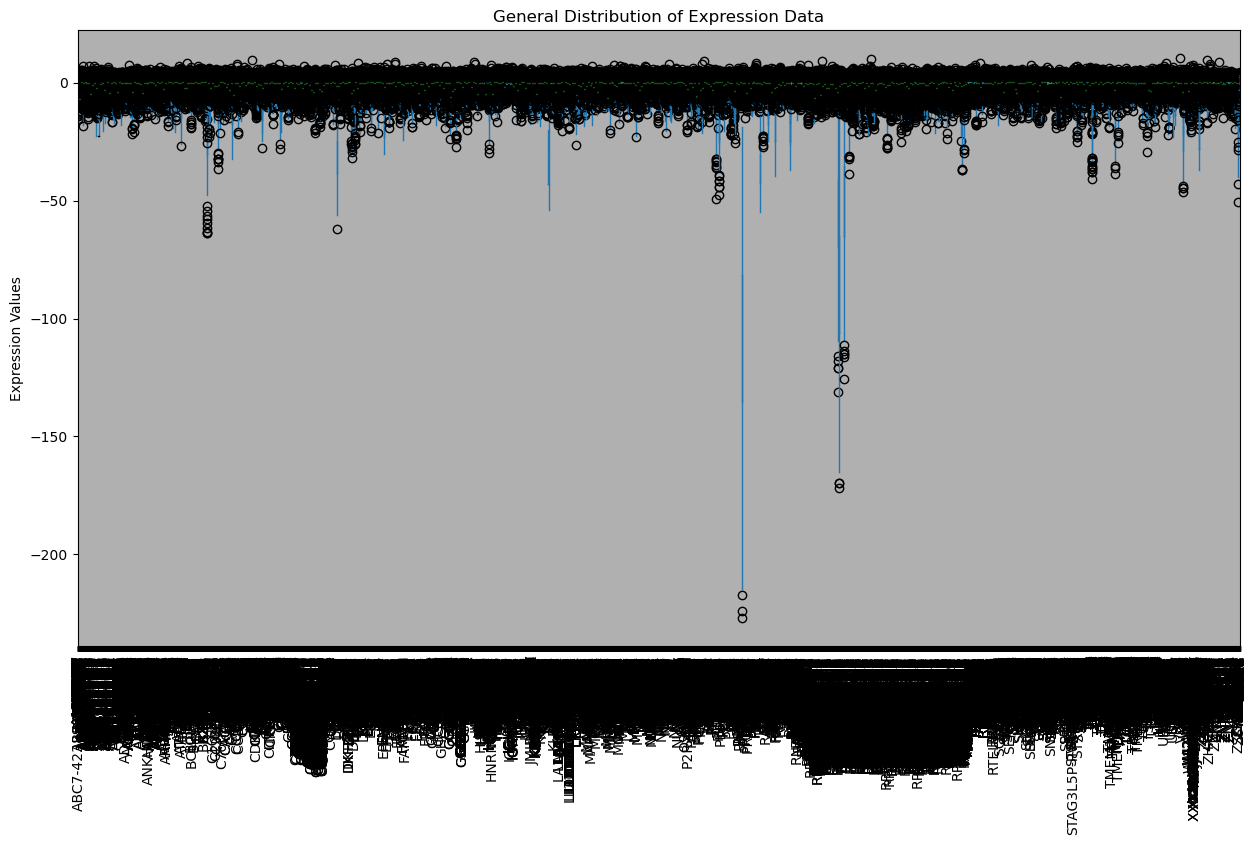

In [238]:

#print(merged_r4[expression_features].describe())

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))  
merged_r4_oa_new[expression_features].boxplot()
plt.title("General Distribution of Expression Data")
plt.xticks(rotation = 90)
plt.ylabel("Expression Values")
plt.show()


In [242]:
'''
Q1 = merged_r4_oa_new[expression_features].quantile(0.25)
Q3 = merged_r4_oa_new[expression_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((merged_r4_oa_new[expression_features] < (Q1 - 1.5 * IQR)) | (merged_r4[expression_features] > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()

print(outlier_counts[outlier_counts > 0].sort_values(ascending = False))
'''

'\nQ1 = merged_r4_oa_new[expression_features].quantile(0.25)\nQ3 = merged_r4_oa_new[expression_features].quantile(0.75)\nIQR = Q3 - Q1\n\noutliers = ((merged_r4_oa_new[expression_features] < (Q1 - 1.5 * IQR)) | (merged_r4[expression_features] > (Q3 + 1.5 * IQR)))\noutlier_counts = outliers.sum()\n\nprint(outlier_counts[outlier_counts > 0].sort_values(ascending = False))\n'

In [26]:
import numpy as np
from sklearn.preprocessing import RobustScaler
'''
X_train[expression_features] = expression_scaler.fit_transform(X_train[expression_features])
X_test[expression_features] = expression_scaler.transform(X_test[expression_features])
X_train[clinical_features] = clinical_scaler.fit_transform(X_train[clinical_features])
X_test[clinical_features] = clinical_scaler.transform(X_test[clinical_features])
'''
numerical_clinical_features = ['AGE_AT_DIAGNOSIS', 'CUMULATIVE_TREATMENT_REGIMEN_COUNT', 'CUMULATIVE_TREATMENT_STAGE_COUNT', 'ALLELIC_RATIO', 'TMB_NONSYNONYMOUS']  
categorical_clinical_features = [col for col in clinical_features if col not in numerical_clinical_features]

clinical_scaler = RobustScaler()
expression_scaler = RobustScaler()

X_train[numerical_clinical_features] = clinical_scaler.fit_transform(X_train[numerical_clinical_features])
X_test[numerical_clinical_features] = clinical_scaler.transform(X_test[numerical_clinical_features])
X_train[expression_features] = expression_scaler.fit_transform(X_train[expression_features])
X_test[expression_features] = expression_scaler.transform(X_test[expression_features])

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile, f_classif

selector = SelectPercentile(score_func = f_classif, percentile = 15).fit(X_train[expression_features], Y_train)
selected_expression_features = list(selector.get_feature_names_out())

X_selected_train = X_train[clinical_features + selected_expression_features]
X_selected_test = X_test[clinical_features + selected_expression_features]

print("Selected expression features:")
print(selected_expression_features)


'''
scores = selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores, tick_label=expression_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Univariate Feature Selection: Feature Scores')
plt.tight_layout()
plt.show()

selected_scores = scores[selector.get_support(indices = True)]
plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_scores)), selected_scores, tick_label=selected_expression_features)
plt.xticks(rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Scores')
plt.title('Univariate Feature Selection: Scores for Selected Features')
plt.tight_layout()
plt.show()
'''

"\nscores = selector.scores_\nplt.figure(figsize=(12, 6))\nplt.bar(range(len(scores)), scores, tick_label=expression_features)\nplt.xticks(rotation=90)\nplt.xlabel('Features')\nplt.ylabel('Scores')\nplt.title('Univariate Feature Selection: Feature Scores')\nplt.tight_layout()\nplt.show()\n\nselected_scores = scores[selector.get_support(indices = True)]\nplt.figure(figsize=(12, 6))\nplt.bar(range(len(selected_scores)), selected_scores, tick_label=selected_expression_features)\nplt.xticks(rotation=90)\nplt.xlabel('Selected Features')\nplt.ylabel('Scores')\nplt.title('Univariate Feature Selection: Scores for Selected Features')\nplt.tight_layout()\nplt.show()\n"

In [256]:
# Saving the 15% of genes
selected_expression_features_df = pd.DataFrame(selected_expression_features, columns = ["Selected Features"])
selected_expression_features_df.to_csv("~/Documents/uzun_lab/aml_ohsu_2022/selected_expression_features.txt", sep="\t")

print("YYAYYY")


YYAYYY


In [73]:
'''
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, precision_score, 
    recall_score, confusion_matrix, precision_recall_curve, auc
)

X_train_combined = np.hstack([X_train[clinical_features], X_train_expression_selected])
X_test_expression_selected = X_test[expression_features].iloc[:, selected_expression_indices]
X_test_combined = np.hstack([X_test[clinical_features], X_test_expression_selected])

clf = LogisticRegression()

param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear']}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_combined, Y_train)

best_logreg_model = grid_search.best_estimator_

Y_pred = best_logreg_model.predict(X_test_combined)
Y_probs = best_logreg_model.predict_proba(X_test_combined)[:, 1] 

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")

def calculate_metrics(Y_test, Y_pred, Y_probs, threshold=0.5):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

    metrics = {
        "AUROC": roc_auc_score(Y_test, Y_probs),
        "AUPRC": auc(*precision_recall_curve(Y_test, Y_probs)[1::-1]),
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, zero_division=0),
        "Recall": recall_score(Y_test, Y_pred, zero_division=0),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0.0, 
    }
    return metrics

metrics = calculate_metrics(Y_test, Y_pred, Y_probs)
print("\nPerformance Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")
'''

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.6753246753246753
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        29
           1       0.73      0.75      0.74        48

    accuracy                           0.68        77
   macro avg       0.65      0.65      0.65        77
weighted avg       0.67      0.68      0.67        77


Performance Metrics:
AUROC: 0.7364
AUPRC: 0.8087
Accuracy: 0.6753
Precision: 0.7347
Recall: 0.7500
Specificity: 0.5517


In [75]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, precision_score, 
    recall_score, confusion_matrix, precision_recall_curve, auc
)

X_train_combined = np.hstack([X_train[clinical_features], X_train_expression_selected])
X_test_expression_selected = X_test[expression_features].iloc[:, selected_expression_indices]
X_test_combined = np.hstack([X_test[clinical_features], X_test_expression_selected])

clf = RandomForestClassifier()

param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20]}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_combined, Y_train)

best_rf_model = grid_search.best_estimator_

Y_pred = best_rf_model.predict(X_test_combined)
Y_probs = best_rf_model.predict_proba(X_test_combined)[:, 1] 

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")

def calculate_metrics(Y_test, Y_pred, Y_probs, threshold=0.5):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

    metrics = {
        "AUROC": roc_auc_score(Y_test, Y_probs),
        "AUPRC": auc(*precision_recall_curve(Y_test, Y_probs)[1::-1]),
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, zero_division=0),
        "Recall": recall_score(Y_test, Y_pred, zero_division=0),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0.0,
    }
    return metrics

metrics = calculate_metrics(Y_test, Y_pred, Y_probs)
print("\nPerformance Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")
'''

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.76      0.81      0.79        48

    accuracy                           0.73        77
   macro avg       0.71      0.70      0.70        77
weighted avg       0.72      0.73      0.72        77


Performance Metrics:
AUROC: 0.7999
AUPRC: 0.8740
Accuracy: 0.7273
Precision: 0.7647
Recall: 0.8125
Specificity: 0.5862


In [87]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, precision_score, 
    recall_score, confusion_matrix, precision_recall_curve, auc
)

X_train_combined = np.hstack([X_train[clinical_features], X_train_expression_selected])
X_test_expression_selected = X_test[expression_features].iloc[:, selected_expression_indices]
X_test_combined = np.hstack([X_test[clinical_features], X_test_expression_selected])

clf = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_combined, Y_train)

best_knn_model = grid_search.best_estimator_

Y_pred = best_knn_model.predict(X_test_combined)
Y_probs = best_knn_model.predict_proba(X_test_combined)[:, 1] 

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")

def calculate_metrics(Y_test, Y_pred, Y_probs, threshold = 0.5):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

    metrics = {
        "AUROC": roc_auc_score(Y_test, Y_probs),
        "AUPRC": auc(*precision_recall_curve(Y_test, Y_probs)[1::-1]),
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, zero_division = 0),
        "Recall": recall_score(Y_test, Y_pred, zero_division = 0),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0.0, 
    }
    return metrics

metrics = calculate_metrics(Y_test, Y_pred, Y_probs)
print("\nPerformance Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")
'''

Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59        29
           1       0.75      0.85      0.80        48

    accuracy                           0.73        77
   macro avg       0.71      0.69      0.69        77
weighted avg       0.72      0.73      0.72        77


Performance Metrics:
AUROC: 0.6997
AUPRC: 0.7888
Accuracy: 0.7273
Precision: 0.7455
Recall: 0.8542
Specificity: 0.5172


In [79]:
'''
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, precision_score, 
    recall_score, confusion_matrix, precision_recall_curve, auc
)

X_train_combined = np.hstack([X_train[clinical_features], X_train_expression_selected])
X_test_expression_selected = X_test[expression_features].iloc[:, selected_expression_indices]
X_test_combined = np.hstack([X_test[clinical_features], X_test_expression_selected])

clf = XGBClassifier()

param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_combined, Y_train)

best_XGBC_model = grid_search.best_estimator_

Y_pred = best_XGBC_model.predict(X_test_combined)
Y_probs = best_XGBC_model.predict_proba(X_test_combined)[:, 1] 

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")

def calculate_metrics(Y_test, Y_pred, Y_probs, threshold = 0.5):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

    metrics = {
        "AUROC": roc_auc_score(Y_test, Y_probs),
        "AUPRC": auc(*precision_recall_curve(Y_test, Y_probs)[1::-1]),
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, zero_division = 0),
        "Recall": recall_score(Y_test, Y_pred, zero_division = 0),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0.0,
    }
    return metrics

metrics = calculate_metrics(Y_test, Y_pred, Y_probs)
print("\nPerformance Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")
'''

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        29
           1       0.76      0.79      0.78        48

    accuracy                           0.71        77
   macro avg       0.69      0.69      0.69        77
weighted avg       0.71      0.71      0.71        77


Performance Metrics:
AUROC: 0.7773
AUPRC: 0.8482
Accuracy: 0.7143
Precision: 0.7600
Recall: 0.7917
Specificity: 0.5862


In [81]:
'''
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, precision_score, 
    recall_score, confusion_matrix, precision_recall_curve, auc
)

X_train_combined = np.hstack([X_train[clinical_features], X_train_expression_selected])
X_test_expression_selected = X_test[expression_features].iloc[:, selected_expression_indices]
X_test_combined = np.hstack([X_test[clinical_features], X_test_expression_selected])

clf = LinearSVC()

param_grid = {'C': [0.1, 1, 10], 'max_iter': [1000, 5000]}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_combined, Y_train)

best_svm_model = grid_search.best_estimator_

Y_pred = best_svm_model.predict(X_test_combined)

Y_decision_values = best_svm_model.decision_function(X_test_combined)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")

def calculate_metrics(Y_test, Y_pred, Y_decision_values, threshold=0.5):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

    metrics = {
        "AUROC": roc_auc_score(Y_test, Y_decision_values),
        "AUPRC": auc(*precision_recall_curve(Y_test, Y_decision_values)[1::-1]),
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, zero_division=0),
        "Recall": recall_score(Y_test, Y_pred, zero_division=0),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0.0,
    }
    return metrics

metrics = calculate_metrics(Y_test, Y_pred, Y_decision_values)
print("\nPerformance Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")
'''

Best Parameters: {'C': 1, 'max_iter': 1000}
Accuracy: 0.6623376623376623
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52        29
           1       0.71      0.77      0.74        48

    accuracy                           0.66        77
   macro avg       0.64      0.63      0.63        77
weighted avg       0.65      0.66      0.66        77


Performance Metrics:
AUROC: 0.7184
AUPRC: 0.7931
Accuracy: 0.6623
Precision: 0.7115
Recall: 0.7708
Specificity: 0.4828


In [101]:
'''
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, precision_score, 
    recall_score, confusion_matrix, precision_recall_curve, auc
)

X_train_combined = np.hstack([X_train[clinical_features], X_train_expression_selected])
X_test_expression_selected = X_test[expression_features].iloc[:, selected_expression_indices]
X_test_combined = np.hstack([X_test[clinical_features], X_test_expression_selected])

clf = SGDClassifier()

param_grid = {'loss': ['log_loss', 'hinge', 'squared_hinge'],
              'penalty': ['l2', 'elasticnet'],
              'max_iter': [1000, 5000, 10000],
              'alpha': [0.0001, 0.001]}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_combined, Y_train)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test_combined)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")

def calculate_metrics(Y_test, Y_pred, Y_probs, threshold = 0.5):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

    metrics = {
        "AUROC": roc_auc_score(Y_test, Y_probs),
        "AUPRC": auc(*precision_recall_curve(Y_test, Y_probs)[1::-1]),
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, zero_division = 0),
        "Recall": recall_score(Y_test, Y_pred, zero_division = 0),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0.0,
    }
    return metrics

metrics = calculate_metrics(Y_test, Y_pred, Y_probs)
print("\nPerformance Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")
'''

Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
Accuracy: 0.6493506493506493
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.45      0.49        29
           1       0.70      0.77      0.73        48

    accuracy                           0.65        77
   macro avg       0.62      0.61      0.61        77
weighted avg       0.64      0.65      0.64        77


Performance Metrics:
AUROC: 0.6997
AUPRC: 0.7888
Accuracy: 0.6494
Precision: 0.6981
Recall: 0.7708
Specificity: 0.4483


In [147]:
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, 
    precision_recall_curve, auc, confusion_matrix
)
#np.random.seed(13)

models = {
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}),
    "XGBoost": (XGBClassifier(), {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}),
    "LinearSVC": (LinearSVC(), {'C': [0.1, 1, 10], 'max_iter': [1000, 5000]}),
    "SGDClassifier": (SGDClassifier(), {'loss': ['log_loss', 'hinge'], 'penalty': ['l2', 'elasticnet'], 'max_iter': [1000, 5000]})
}

results = {}
model_scores_dict = {}

for name, (model, param_grid) in models.items():
    print(f"\nRunning model: {name}")
    grid_search = GridSearchCV(model, param_grid, cv = 3, n_jobs =-1)
    grid_search.fit(X_selected_train, Y_train)
    best_model = grid_search.best_estimator_

    if hasattr(best_model, 'decision_function'):
        Y_scores = best_model.decision_function(X_selected_test)
    elif hasattr(best_model, 'predict_proba'):
        Y_scores = best_model.predict_proba(X_selected_test)[:, 1]
    else:
        Y_scores = None

    Y_pred = best_model.predict(X_selected_test)
    model_scores_dict[name] = Y_scores

    # Metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, zero_division = 0)
    recall = recall_score(Y_test, Y_pred, zero_division = 0)
    auroc = roc_auc_score(Y_test, Y_scores) if Y_scores is not None else None
    auprc = auc(*precision_recall_curve(Y_test, Y_scores)[1::-1]) if Y_scores is not None else None

    results[name] = {
        "Best Params": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "AUROC": auroc,
        "AUPRC": auprc,
        "Confusion Matrix": confusion_matrix(Y_test, Y_pred).tolist()
    }

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    if auroc is not None:
        print(f"AUROC: {auroc:.4f}, AUPRC: {auprc:.4f}")


Running model: Logistic Regression
Best Params: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.7143, Precision: 0.7600, Recall: 0.7917
AUROC: 0.7672, AUPRC: 0.8424

Running model: Random Forest
Best Params: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.7532, Precision: 0.7736, Recall: 0.8542
AUROC: 0.8355, AUPRC: 0.8891

Running model: K-Nearest Neighbors
Best Params: {'metric': 'euclidean', 'n_neighbors': 7}
Accuracy: 0.7532, Precision: 0.7636, Recall: 0.8750
AUROC: 0.7834, AUPRC: 0.8395

Running model: XGBoost
Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.7792, Precision: 0.7925, Recall: 0.8750
AUROC: 0.8635, AUPRC: 0.9193

Running model: LinearSVC
Best Params: {'C': 0.1, 'max_iter': 1000}
Accuracy: 0.7143, Precision: 0.7600, Recall: 0.7917
AUROC: 0.7471, AUPRC: 0.8163

Running model: SGDClassifier
Best Params: {'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
Accuracy: 0.6883, Precision: 0.7500, Recall: 0.7500
AUROC: 0.7744, AUPRC: 0.8524


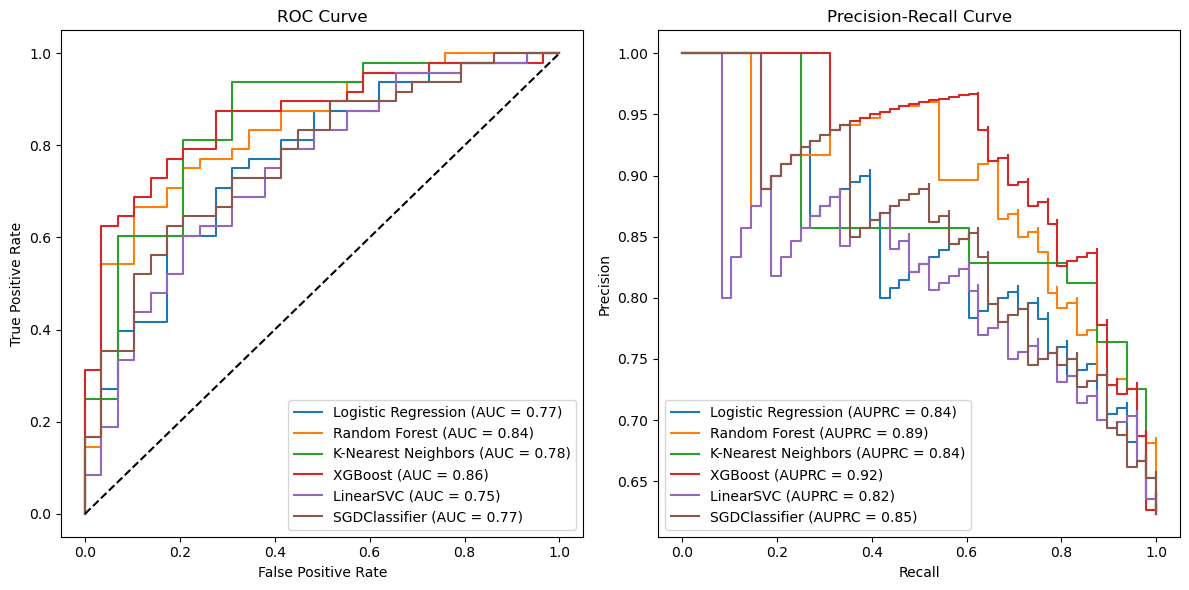

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_pr_curves(Y_test, model_scores_dict):
    plt.figure(figsize=(12, 6))

    # ROC
    plt.subplot(1, 2, 1)
    for name, Y_scores in model_scores_dict.items():
        fpr, tpr, _ = roc_curve(Y_test, Y_scores)
        roc_auc = roc_auc_score(Y_test, Y_scores)
        plt.plot(fpr, tpr, label = f'{name} (AUC = {roc_auc:.2f})', drawstyle = 'steps')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # PRC
    plt.subplot(1, 2, 2)
    for name, Y_scores in model_scores_dict.items():
        precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUPRC = {pr_auc:.2f})', drawstyle = 'steps')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_roc_pr_curves(Y_test, model_scores_dict)

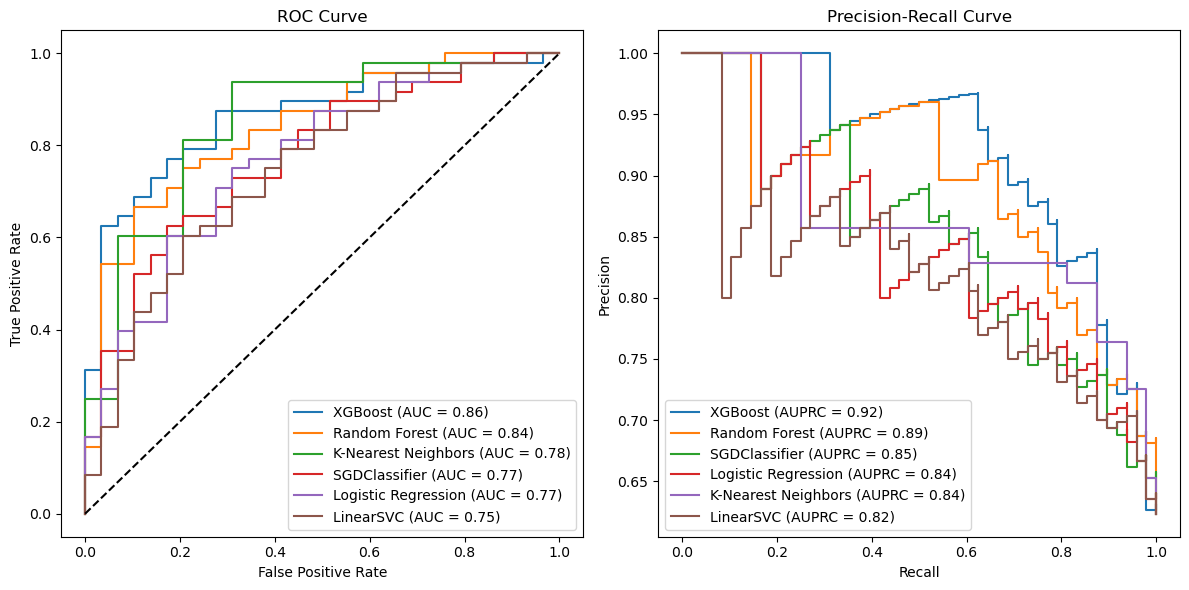

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score

def plot_roc_pr_curves(Y_test, model_scores_dict):
    plt.figure(figsize=(12, 6))

    roc_auc_scores = {
        name: roc_auc_score(Y_test, Y_scores) for name, Y_scores in model_scores_dict.items()
    }
    sorted_models_roc = sorted(roc_auc_scores.items(), key=lambda x: x[1], reverse=True)

    pr_auc_scores = {}
    for name, Y_scores in model_scores_dict.items():
        precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
        pr_auc_scores[name] = auc(recall, precision)  # auc(x, y) expects x=recall, y=precision

    sorted_models_pr = sorted(pr_auc_scores.items(), key=lambda x: x[1], reverse=True)

    # ROC Curve
    plt.subplot(1, 2, 1)
    for name, _ in sorted_models_roc:
        Y_scores = model_scores_dict[name]
        fpr, tpr, _ = roc_curve(Y_test, Y_scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[name]:.2f})', drawstyle='steps')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, _ in sorted_models_pr:
        Y_scores = model_scores_dict[name]
        precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
        plt.plot(recall, precision, label=f'{name} (AUPRC = {pr_auc_scores[name]:.2f})', drawstyle='steps')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_roc_pr_curves(Y_test, model_scores_dict)

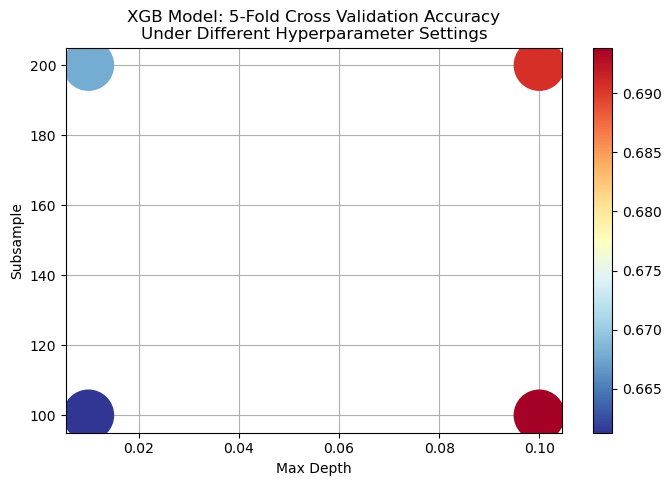

In [171]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

plt.figure(figsize=(8, 5))

sc = plt.scatter(grid_search.cv_results_["param_learning_rate"], grid_search.cv_results_["param_n_estimators"], 
                 c=grid_search.cv_results_["mean_test_score"], cmap=plt.get_cmap("RdYlBu_r"), s=1300)

plt.colorbar(sc) 
plt.grid(True)
plt.gca().set_axisbelow(True)

plt.xlabel("Max Depth")  
plt.ylabel("Subsample")  
plt.title("XGB Model: 5-Fold Cross Validation Accuracy\nUnder Different Hyperparameter Settings")
plt.autoscale()
plt.show()

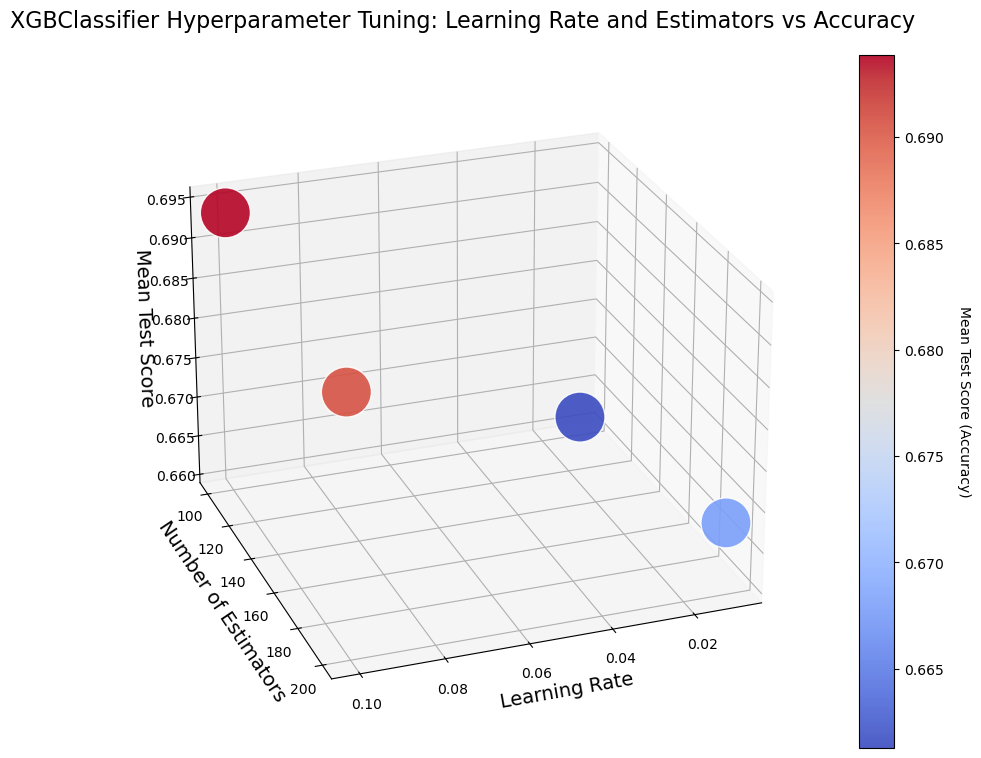

In [187]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(13, 9))

ax = plt.axes(projection='3d')

if 'param_learning_rate' in grid_search.cv_results_ and 'param_n_estimators' in grid_search.cv_results_:
    sc = ax.scatter(grid_search.cv_results_["param_learning_rate"], grid_search.cv_results_["param_n_estimators"], 
        grid_search.cv_results_["mean_test_score"], c=grid_search.cv_results_["mean_test_score"], cmap=plt.get_cmap("coolwarm"),  
        s=1300, edgecolors='w', alpha=0.9, marker='o')

    cbar = plt.colorbar(sc)
    cbar.set_label('Mean Test Score (Accuracy)', rotation=270, labelpad=20)

    ax.set_xlabel('Learning Rate', fontsize=14)
    ax.set_ylabel('Number of Estimators', fontsize=14)
    ax.set_zlabel('Mean Test Score', fontsize=14)
    ax.set_title('XGBClassifier Hyperparameter Tuning: Learning Rate and Estimators vs Accuracy', fontsize=16, pad=20)
    ax.view_init(elev=25, azim=70)
    ax.grid(True, linestyle='---', alpha=0.6)

    plt.show()
else:
    print("so um these params didnt show up: 'param_learning_rate' and 'param_n_estimators'")

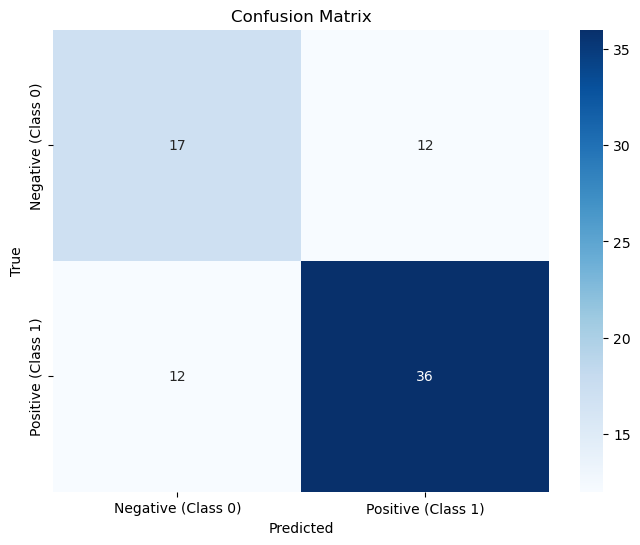

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, best_model.predict(X_selected_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative (Class 0)', 'Positive (Class 1)'], yticklabels=['Negative (Class 0)', 'Positive (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()